# Objective:-We want to analyze custumer review

In [1]:
!pip install -U textblob


In [2]:
!python -m textblob.download_corpora

Finished.


[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!


In [3]:
!pip install wordcloud

In [4]:

from bs4 import BeautifulSoup as bs #Beautiful Soup is a Python library for pulling data out of HTML and XML files.
import requests # making HTTP requests in Python

In [5]:
bt='https://www.amazon.in'
#ul='https://www.amazon.in/Samsung-Galaxy-Light-Blue-128GB/dp/B0B4PSD221/ref=sr_1_1?crid=2WBZFJL9LGNPK&keywords=samsung+A23&qid=1656943981&refinements=p_n_feature_eight_browse-bin%3A8561117031&rnid=8561111031&s=electronics&sprefix=samsung+a23%2Caps%2C304&sr=1-1'
ul='https://www.amazon.in/iQOO-128GB-Storage-Snapdragon%C2%AE-FlashCharge/product-reviews/B07WDKLDRX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber=2'

In [6]:
#https://www.amazon.in/iQOO-128GB-Storage-Snapdragon%C2%AE-FlashCharge/product-reviews/B07WDKLDRX/ref=cm_cr_dp_d_show_all_btm?ie=UTF8&reviewerType=all_reviews
#https://www.amazon.in/iQOO-128GB-Storage-Snapdragon%C2%AE-FlashCharge/product-reviews/B07WDKLDRX/ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=

SyntaxError: invalid syntax (Temp/ipykernel_27384/4253597424.py, line 1)

In [7]:
cust_name = []   #define list to store Name of the customers
review_title = []
rate = []
review_content = []

In [9]:
tt = 0
while tt == 0:
    page = requests.get(ul)
    while page.ok == False:#if it fails to connect then this loop will be executing continuously until get response from site  
        page = requests.get(ul)
   

    soup = bs(page.content,'html.parser')
    soup.prettify()       #Prettify() function in BeautifulSoup will enable us to view how the tags are nested in the document.
    
    names = soup.find_all('span', class_='a-profile-name')
    names.pop(0)
    names.pop(0)
    
    for i in range(0,len(names)):
        cust_name.append(names[i].get_text())
        
    title = soup.find_all("a",{"data-hook":"review-title"})
    for i in range(0,len(title)):
        review_title.append(title[i].get_text())

    rating = soup.find_all('i',class_='review-rating')
    rating.pop(0)
    rating.pop(0)
    for i in range(0,len(rating)):
        rate.append(rating[i].get_text())

    review = soup.find_all("span",{"data-hook":"review-body"})
    for i in range(0,len(review)):
        review_content.append(review[i].get_text())
        
    try:
        for div in soup.findAll('li', attrs={'class':'a-last'}):
            A = div.find('a')['href']
        ul = bt + A
    except:
        break

In [10]:
len(cust_name)

1737

In [11]:
len(review_title)

1354

In [12]:
len(review_content)

1354

In [13]:
len(rate)

1354

In [14]:
review_title[:] = [titles.lstrip('\n') for titles in review_title]

review_title[:] = [titles.rstrip('\n') for titles in review_title]

review_content[:] = [titles.lstrip('\n') for titles in review_content]

review_content[:] = [titles.rstrip('\n') for titles in review_content]

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
from nltk.tokenize import word_tokenize
from textblob import TextBlob, Word, Blobber
import wordcloud
from wordcloud import WordCloud
from nltk.stem import WordNetLemmatizer
lemmatizer=WordNetLemmatizer()
!pip install nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [16]:
df = pd.DataFrame()

In [17]:
df['Customer Name'] = cust_name
df['Review Title'] = pd.Series(review_title)
df['Rating'] = pd.Series(rate)
df['Reviews'] = pd.Series(review_content)

In [18]:
df.Reviews.duplicated().sum()

521

In [19]:
#df.to_csv(r'C:\Users\DELL\stats assignment\ass 11\fill.csv')


In [21]:
data = pd.read_csv("C:fill.csv")

In [22]:
df_1=df[['Reviews']]
df_1=df_1.iloc[:1000,:]

In [23]:
import re

In [24]:
def punc(txt):
    text=txt.lower()
    text=re.sub('[^a-zA-Z]+',' ',text)
    return text
df_1['Reviews']=df_1['Reviews'].apply(punc)

In [25]:
df_1.isnull().sum()

Reviews    0
dtype: int64

In [26]:
data=df_1

In [27]:
data.isnull().sum()

Reviews    0
dtype: int64

In [28]:
data.dtypes

Reviews    object
dtype: object

In [29]:
data.describe()

,Reviews
count,1000
unique,957
top,
freq,18


In [30]:
data.dtypes

Reviews    object
dtype: object

In [31]:
## removing all stopwords(english)....###
from nltk.corpus import stopwords

In [32]:
stop_words=stopwords.words('english')

In [33]:
data['Reviews']=data['Reviews'].apply(lambda x: " ".join(word for word in x.split() if word not in stop_words))


In [34]:
data

,Reviews
0,seen heats lot youtube neo amazed type cooling...
1,media could loaded
2,iqoo neo worst camera like normal midrange pho...
3,never felt kind gaming dominance phone sign he...
4,cons camera good night photo bad slow motion v...
...,...
995,value money go
996,decent camera quality price range
997,good
998,battery life good


In [35]:
from textblob import Word
data['Reviews']= data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

import re
pattern = r"((?<=^)|(?<= )).((?=$)|(?= ))"
data['Reviews']= data['Reviews'].apply(lambda x:(re.sub(pattern, '',x).strip()))

In [36]:
data['Reviews'].head()

0    seen heat lot youtube neo amazed type cooling ...
1                                  medium could loaded
2    iqoo neo worst camera like normal midrange pho...
3    never felt kind gaming dominance phone sign he...
4    con camera good night photo bad slow motion vi...
Name: Reviews, dtype: object

In [37]:
from sklearn.feature_extraction.text import CountVectorizer


vec = CountVectorizer()
X = vec.fit_transform(data['Reviews'])
df = pd.DataFrame(X.toarray(), columns=vec.get_feature_names())
print(df)

     aa  aacha  aap  aapka  aata  abd  ability  able  abnormal  absolute  ...  \
0     0      0    0      0     0    0        0     0         0         0  ...   
1     0      0    0      0     0    0        0     0         0         0  ...   
2     0      0    0      0     0    0        0     0         0         0  ...   
3     0      0    0      0     0    0        0     0         0         0  ...   
4     0      0    0      0     0    0        0     0         0         0  ...   
..   ..    ...  ...    ...   ...  ...      ...   ...       ...       ...  ...   
995   0      0    0      0     0    0        0     0         0         0  ...   
996   0      0    0      0     0    0        0     0         0         0  ...   
997   0      0    0      0     0    0        0     0         0         0  ...   
998   0      0    0      0     0    0        0     0         0         0  ...   
999   0      0    0      0     0    0        0     0         0         0  ...   

     yo  yono  youtube  yr 

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [38]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer()
TFIDF=tfidf.fit_transform(data['Reviews'])
print(TFIDF)

  (0, 1814)	0.16173602680532465
  (0, 2166)	0.17935245306722689
  (0, 2827)	0.14916087743228826
  (0, 801)	0.21095182350115801
  (0, 1547)	0.2488387686216073
  (0, 2737)	0.1532227648279256
  (0, 1830)	0.11427462263622755
  (0, 1062)	0.16314382160431715
  (0, 1628)	0.19333539723925577
  (0, 1833)	0.16943139629083537
  (0, 258)	0.12672459516175305
  (0, 1599)	0.18428745503801047
  (0, 2142)	0.17935245306722689
  (0, 944)	0.10678889624997602
  (0, 1842)	0.1817317539021896
  (0, 112)	0.16038345408959007
  (0, 867)	0.16173602680532465
  (0, 185)	0.14070753933378194
  (0, 1112)	0.11680353838536152
  (0, 2475)	0.13923982065589674
  (0, 734)	0.10017575841009337
  (0, 1267)	0.3234720536106493
  (0, 174)	0.11994080783331987
  (0, 2473)	0.2488387686216073
  (0, 580)	0.19004851287712618
  :	:
  (993, 148)	0.7212639625787319
  (993, 2157)	0.5267529881776407
  (993, 75)	0.33964976273222847
  (993, 225)	0.22007389191171955
  (993, 1120)	0.19625265986967289
  (994, 1571)	0.6472248843529312
  (994, 191

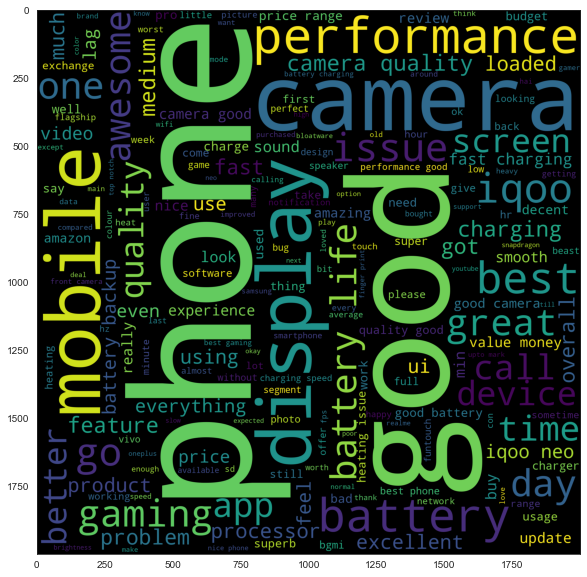

In [39]:

Review_wordcloud = ' '.join(data['Reviews'])
Q_wordcloud=WordCloud(
                    background_color='black',
                    width=2000,
                    height=2000
                   ).generate(Review_wordcloud)
fig = plt.figure(figsize = (10, 10))
plt.axis('on')
plt.imshow(Q_wordcloud)

# Removing Punctuation
The next step is to remove punctuation, as it doesn’t add any extra information while treating text data. Therefore removing all instances of it will help us reduce the size of the training data.

In [40]:
data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')
data['Reviews'].head()

C:\Users\DELL\AppData\Local\Temp/ipykernel_27384/2640507917.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  data['Reviews'] = data['Reviews'].str.replace('[^\w\s]','')


0    seen heat lot youtube neo amazed type cooling ...
1                                  medium could loaded
2    iqoo neo worst camera like normal midrange pho...
3    never felt kind gaming dominance phone sign he...
4    con camera good night photo bad slow motion vi...
Name: Reviews, dtype: object

#  Common word removal
Previously, we just removed commonly occurring words in a general sense. We can also remove commonly occurring words from our text data First, let’s check the 10 most frequently occurring words in our text data then take call to remove or retain.

In [41]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[:10]
freq

good           585
phone          583
camera         480
battery        367
quality        209
performance    205
best           204
display        180
mobile         173
charging       173
dtype: int64

# Now, let’s remove these words as their presence will not of any use in classification of our text data.

In [42]:

data['Reviews'] = data['Reviews'].apply(lambda x: " ".join(x for x in x.split() if x not in freq))
data['Reviews'].head()


0    seen heat lot youtube neo amazed type cooling ...
1                                  medium could loaded
2    iqoo neo worst like normal midrange flagship u...
3    never felt kind gaming dominance sign heating ...
4    con night photo bad slow motion video output n...
Name: Reviews, dtype: object

#  Rare words removal
Similarly, just as we removed the most common words, this time let’s remove rarely occurring words from the text. Because they’re so rare, the association between them and other words is dominated by noise. You can replace rare words with a more general form and then this will have higher counts

In [43]:
freq = pd.Series(' '.join(data['Reviews']).split()).value_counts()[-10:]
freq


firmware        1
limited         1
attaching       1
chargerand      1
wats            1
lightcould      1
audiocamera     1
displaygreat    1
greatgood       1
aswome          1
dtype: int64

In [44]:
from textblob import TextBlob
data['Reviews'][:10].apply(lambda x: str(TextBlob(x).correct()))

0    seen heat lot couture neo amazed type cooling ...
1                                  medium could loaded
2    into neo worst like normal midrange flagship u...
3    never felt kind gazing dominance sign heating ...
4    con night photo bad slow motion video output n...
5                                                     
6    cannot continue call minute call drop issue re...
7    although gazing tormented expected sound least...
8    used day mentioning important point used day d...
9    total disappointment astute score shown promot...
Name: Reviews, dtype: object

# 2.7 Tokenization
Tokenization refers to dividing the text into a sequence of words or sentences. In our example, we have used the textblob library to first transform our reviews into a blob and then converted them into a series of words.

In [45]:
TextBlob(data['Reviews'][0]).words

WordList(['seen', 'heat', 'lot', 'youtube', 'neo', 'amazed', 'type', 'cooling', 'smatphone', 'awesome', 'hz', 'smooth', 'go', 'back', 'hz', 'every', 'app', 'open', 'fast', 'ram', 'management', 'better', 'oneplus', 'mean', 'funtouch', 'one', 'touch', 'lockscreen', 'earlier', 'used', 'realme', 'ok'])

In [46]:
TextBlob(data['Reviews'][1]).words

WordList(['medium', 'could', 'loaded'])

# Stemming refers to the removal of suffices, like “ing”, “ly”, “s”, etc. by a simple rule-based approach. For this purpose, we will use PorterStemmer from the NLTK library.

In [47]:
from nltk.stem import PorterStemmer
st = PorterStemmer()
data['Reviews'][:10].apply(lambda x: " ".join([st.stem(word) for word in x.split()]))

0    seen heat lot youtub neo amaz type cool smatph...
1                                    medium could load
2    iqoo neo worst like normal midrang flagship us...
3    never felt kind game domin sign heat lag bgmi ...
4    con night photo bad slow motion video output n...
5                                                     
6    cannot continu call minut call drop issu reque...
7    although game orient expect sound least initi ...
8    use day mention import point use day dust insi...
9    total disappoint antutu score shown promot ima...
Name: Reviews, dtype: object

# Lemmatization
Lemmatization is a more effective option than stemming because it converts the word into its root word, rather than just stripping the suffices. It makes use of the vocabulary and does a morphological analysis to obtain the root word. Therefore, we usually prefer using lemmatization over stemming.

In [48]:
from textblob import Word
data['Reviews'] = data['Reviews'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))
data['Reviews'].head()


0    seen heat lot youtube neo amazed type cooling ...
1                                  medium could loaded
2    iqoo neo worst like normal midrange flagship u...
3    never felt kind gaming dominance sign heating ...
4    con night photo bad slow motion video output n...
Name: Reviews, dtype: object

# Advance Text Processing
Up to this point, we have done all the basic pre-processing steps in order to clean our data. Now, we can finally move on to extracting features using NLP techniques.

 
# N-grams
N-grams are the combination of multiple words used together. Ngrams with N=1 are called unigrams. Similarly, bigrams (N=2), trigrams (N=3) and so on can also be used.

Unigrams do not usually contain as much information as compared to bigrams and trigrams. The basic principle behind n-grams is that they capture the language structure, like what letter or word is likely to follow the given one. The longer the n-gram (the higher the n), the more context you have to work with. Optimum length really depends on the application – if your n-grams are too short, you may fail to capture important differences. On the other hand, if they are too long, you may fail to capture the “general knowledge” and only stick to particular cases.

In [49]:
TextBlob(data['Reviews'][0]).ngrams(2)

[WordList(['seen', 'heat']),
 WordList(['heat', 'lot']),
 WordList(['lot', 'youtube']),
 WordList(['youtube', 'neo']),
 WordList(['neo', 'amazed']),
 WordList(['amazed', 'type']),
 WordList(['type', 'cooling']),
 WordList(['cooling', 'smatphone']),
 WordList(['smatphone', 'awesome']),
 WordList(['awesome', 'hz']),
 WordList(['hz', 'smooth']),
 WordList(['smooth', 'go']),
 WordList(['go', 'back']),
 WordList(['back', 'hz']),
 WordList(['hz', 'every']),
 WordList(['every', 'app']),
 WordList(['app', 'open']),
 WordList(['open', 'fast']),
 WordList(['fast', 'ram']),
 WordList(['ram', 'management']),
 WordList(['management', 'better']),
 WordList(['better', 'oneplus']),
 WordList(['oneplus', 'mean']),
 WordList(['mean', 'funtouch']),
 WordList(['funtouch', 'one']),
 WordList(['one', 'touch']),
 WordList(['touch', 'lockscreen']),
 WordList(['lockscreen', 'earlier']),
 WordList(['earlier', 'used']),
 WordList(['used', 'realme']),
 WordList(['realme', 'ok'])]

# Term frequency
Term frequency is simply the ratio of the count of a word present in a sentence, to the length of the sentence.

Therefore, we can generalize term frequency as:

TF = (Number of times term T appears in the particular row) / (number of terms in that row)

In [50]:
tf1 = (data['Reviews'][1:10]).apply(lambda x: pd.value_counts(x.split(" "))).sum(axis = 0).reset_index()
tf1.columns = ['words','tf']
tf1

,words,tf
0,medium,1.0
1,could,2.0
2,loaded,1.0
3,shared,2.0
4,data,2.0
...,...,...
224,product,1.0
225,page,1.0
226,bought,1.0
227,offer,1.0


# Inverse Document Frequency
The intuition behind inverse document frequency (IDF) is that a word is not of much use to us if it’s appearing in all the documents.

Therefore, the IDF of each word is the log of the ratio of the total number of rows to the number of rows in which that word is present.

IDF = log(N/n), where, N is the total number of rows and n is the number of rows in which the word was present.

In [51]:
for i,word in enumerate(tf1['words']):
    tf1.loc[i, 'idf'] = np.log(data.shape[0]/(len(data[data['Reviews'].str.contains(word)])))

In [52]:
tf1

,words,tf,idf
0,medium,1.0,2.577022
1,could,2.0,2.353878
2,loaded,1.0,2.688248
3,shared,2.0,6.214608
4,data,2.0,4.199705
...,...,...,...
224,product,1.0,2.718101
225,page,1.0,5.809143
226,bought,1.0,3.912023
227,offer,1.0,3.218876


The more the value of IDF, the more unique is the word.

# Term Frequency – Inverse Document Frequency (TF-IDF)
TF-IDF is the multiplication of the TF and IDF which we calculated above.

In [53]:
tf1['tfidf'] = tf1['tf'] * tf1['idf']
tf1

,words,tf,idf,tfidf
0,medium,1.0,2.577022,2.577022
1,could,2.0,2.353878,4.707757
2,loaded,1.0,2.688248,2.688248
3,shared,2.0,6.214608,12.429216
4,data,2.0,4.199705,8.399410
...,...,...,...,...
224,product,1.0,2.718101,2.718101
225,page,1.0,5.809143,5.809143
226,bought,1.0,3.912023,3.912023
227,offer,1.0,3.218876,3.218876


In [54]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=1000, lowercase=True, analyzer='word',
 stop_words= 'english',ngram_range=(1,1))
data_vect = tfidf.fit_transform(data['Reviews'])

data_vect

<1000x1000 sparse matrix of type '<class 'numpy.float64'>'
	with 10048 stored elements in Compressed Sparse Row format>

# Bag of Words
Bag of Words (BoW) refers to the representation of text which describes the presence of words within the text data. The intuition behind this is that two similar text fields will contain similar kind of words, and will therefore have a similar bag of words. Further, that from the text alone we can learn something about the meaning of the document.

For implementation, sklearn provides a separate function for it as shown below

In [55]:
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer(max_features=1000, lowercase=True, ngram_range=(1,1),analyzer = "word")
data_bow = bow.fit_transform(data['Reviews'])
data_bow

<1000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 11524 stored elements in Compressed Sparse Row format>

# Sentiment Analysis
If you recall, our problem was to detect the sentiment of the tweet. So, before applying any ML/DL models (which can have a separate feature detecting the sentiment using the textblob library), let’s check the sentiment of the first few tweets.

In [56]:
data['Reviews'][:10].apply(lambda x: TextBlob(x).sentiment)

0      (0.25416666666666665, 0.5319444444444444)
1                                     (0.0, 0.0)
2    (0.020370370370370372, 0.48148148148148145)
3      (0.02849999999999999, 0.5248333333333334)
4     (-0.18749999999999997, 0.4666666666666667)
5                                     (0.0, 0.0)
6                                     (0.0, 0.1)
7     (0.06547619047619048, 0.42142857142857143)
8      (0.20111111111111116, 0.6081481481481481)
9                                  (-0.3, 0.575)
Name: Reviews, dtype: object

# Here, we only extract polarity as it indicates the sentiment as value nearer to 1 means a positive sentiment and values nearer to -1 means a negative sentiment. This can also work as a feature for building a machine learning model.

In [57]:
data['sentiment'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0] )
data[['Reviews','sentiment']].head()

,Reviews,sentiment
0,seen heat lot youtube neo amazed type cooling ...,0.254167
1,medium could loaded,0.000000
2,iqoo neo worst like normal midrange flagship u...,0.020370
3,never felt kind gaming dominance sign heating ...,0.028500
4,con night photo bad slow motion video output n...,-0.187500


In [58]:

import collections
from collections import Counter
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [59]:
from textblob import TextBlob
data['polarity'] = data['Reviews'].apply(lambda x: TextBlob(x).sentiment[0])
data[['Reviews','polarity']].head(5)

,Reviews,polarity
0,seen heat lot youtube neo amazed type cooling ...,0.254167
1,medium could loaded,0.000000
2,iqoo neo worst like normal midrange flagship u...,0.020370
3,never felt kind gaming dominance sign heating ...,0.028500
4,con night photo bad slow motion video output n...,-0.187500


In [60]:
# Displaying top 5 positive posts of Category_A
data[data.polarity>0].head(5)

,Reviews,sentiment,polarity
0,seen heat lot youtube neo amazed type cooling ...,0.254167,0.254167
2,iqoo neo worst like normal midrange flagship u...,0.020370,0.020370
3,never felt kind gaming dominance sign heating ...,0.028500,0.028500
7,although gaming oriented expected sound least ...,0.065476,0.065476
8,used day mentioning important point used day d...,0.201111,0.201111


In [61]:
def sent_type(text): 
    for i in (text):
        if i>0:
            print('positive')
        elif i==0:
            print('neutral')
        else:
            print('negative')

In [62]:
sent_type(data['polarity'])

positive
neutral
positive
positive
negative
neutral
neutral
positive
positive
negative
positive
positive
positive
negative
positive
negative
positive
positive
negative
positive
positive
negative
negative
positive
positive
negative
neutral
positive
positive
neutral
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
negative
positive
positive
negative
positive
negative
negative
positive
positive
positive
positive
positive
positive
negative
negative
positive
neutral
negative
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
negative
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positive
positiv

In [63]:
data["category"]=data['polarity']

In [64]:
data.loc[data.category > 0,'category']="Positive"
data.loc[data.category !='Positive','category']="Negative"

In [65]:
data["category"]=data["category"].astype('category')
data.dtypes

Reviews        object
sentiment     float64
polarity      float64
category     category
dtype: object

<AxesSubplot:xlabel='category', ylabel='count'>

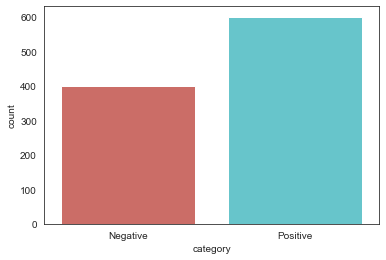

In [66]:
sns.countplot(x='category',data=data,palette='hls')

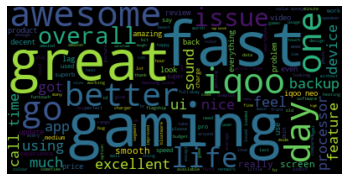

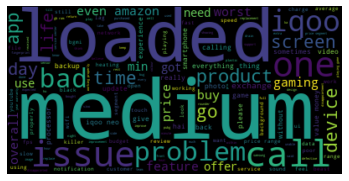

In [67]:
positive_reviews= data[data.category=='Positive']
negative_reviews= data[data.category=='Negative']
positive_reviews_text=" ".join(positive_reviews.Reviews.to_numpy().tolist())
negative_reviews_text=" ".join(negative_reviews.Reviews.to_numpy().tolist())
positive_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(positive_reviews_text)
negative_reviews_cloud=WordCloud(background_color='black',max_words=150).generate(negative_reviews_text)
plt.imshow(positive_reviews_cloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()
plt.imshow(negative_reviews_cloud,interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0) 
plt.show()

In [68]:
#Percentage of positive review
data.category.value_counts(normalize=True).mul(100)

Positive    60.0
Negative    40.0
Name: category, dtype: float64

# Conclusion:-We got the 60% positive review of iQOO Neo 6 5G (Dark Nova, 8GB RAM, 128GB Storage) | Snapdragon® 870 5G | 80W FlashCharge